## Decision Tree Classifier

### Modeling Steps

* Choose a type of model
* Choose model parameters
* Fit the model to the training data
* Use the model to estimate labels for testing data
* Check the model accuracy

### How do we build the model?
* A good multi-class classification machine learning algorithm involves the following steps:
    * Import libraries
    * Fetch the dataset
    * Create the dependent variable class
    * Extract features and output
    * Train-Test dataset splitting (may also include validation dataset)
    * Feature scaling
    * Train the model
    * Calculate the model score using the metric deemed fit based on the problem
    * Save the model for future use

### Dataset of Iris
* Iris flower data set is a  multivariate data set.
* The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris Virginica, Iris Versicolor).<br>

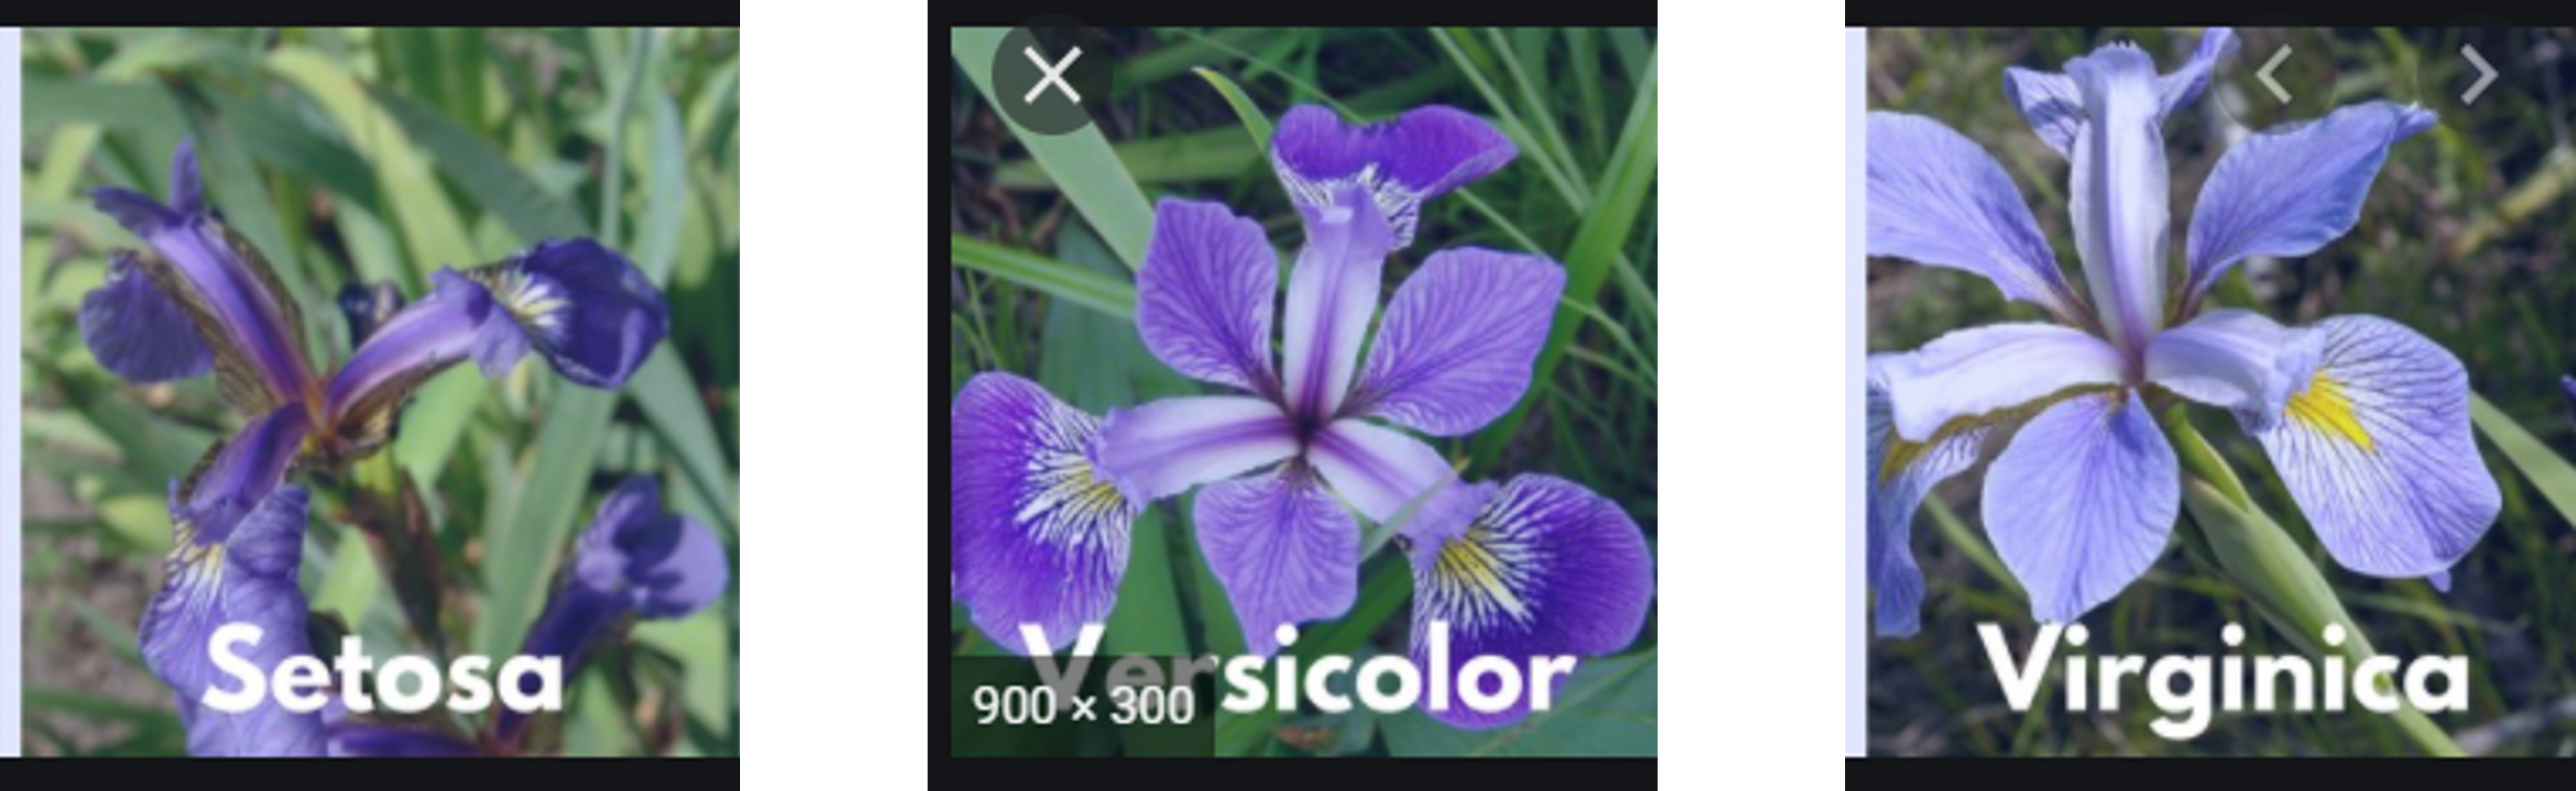

* Four  features were measured from each sample: the length(cm) and the width(cm) of sepal and petals. Sepals are the outermost whorl whereas petals form the inner whorl. <br>

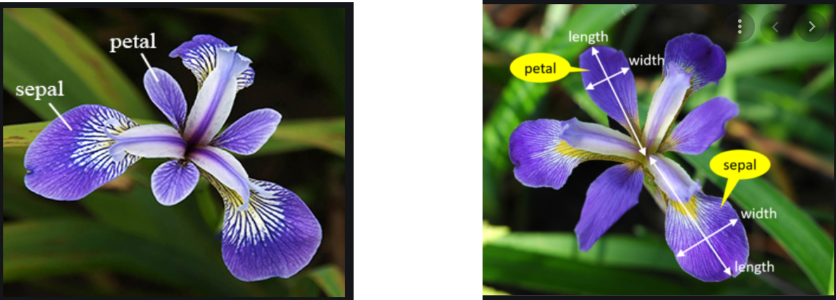

In [2]:
#Full Solution - Splide training and testing

In [3]:
#1. import library
import os 
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs
from sklearn import tree

In [4]:
#2. Load data
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

#convrt to data frame 
X = pd.DataFrame(iris_X)
y= pd.DataFrame(iris_y)
#print(iris)
#print(X)
#print(y)
print("data length:", len(y))

data length: 150


In [10]:
# create save path
path = os.getcwd()
savePath = path + '\\decision_tree_results\\'
print(savePath)

C:\Users\AlitheiaDeus\DeusLocker\L2C\sit\DA\Tutorials\decision_tree_results\


### Key steps: 
* Split data 3/4 for training, 1/4 for testing
* Input: X-tr: training, X-v: test
* Target output: y_tr: training data label, y_v: test data label
* Fit model using (X_tr and y_tr) 
* Predict y_p
* Compare(y_v and y_p) and calculate accuracy
* Plot and save decision tree: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
* Calculate confusion matrix

training data length: 112
verification data length: 38
Accuracy: 0.95
training data length: 112
verification data length: 38
Accuracy: 1.0
training data length: 113
verification data length: 37
Accuracy: 0.92
training data length: 113
verification data length: 37
Accuracy: 0.92


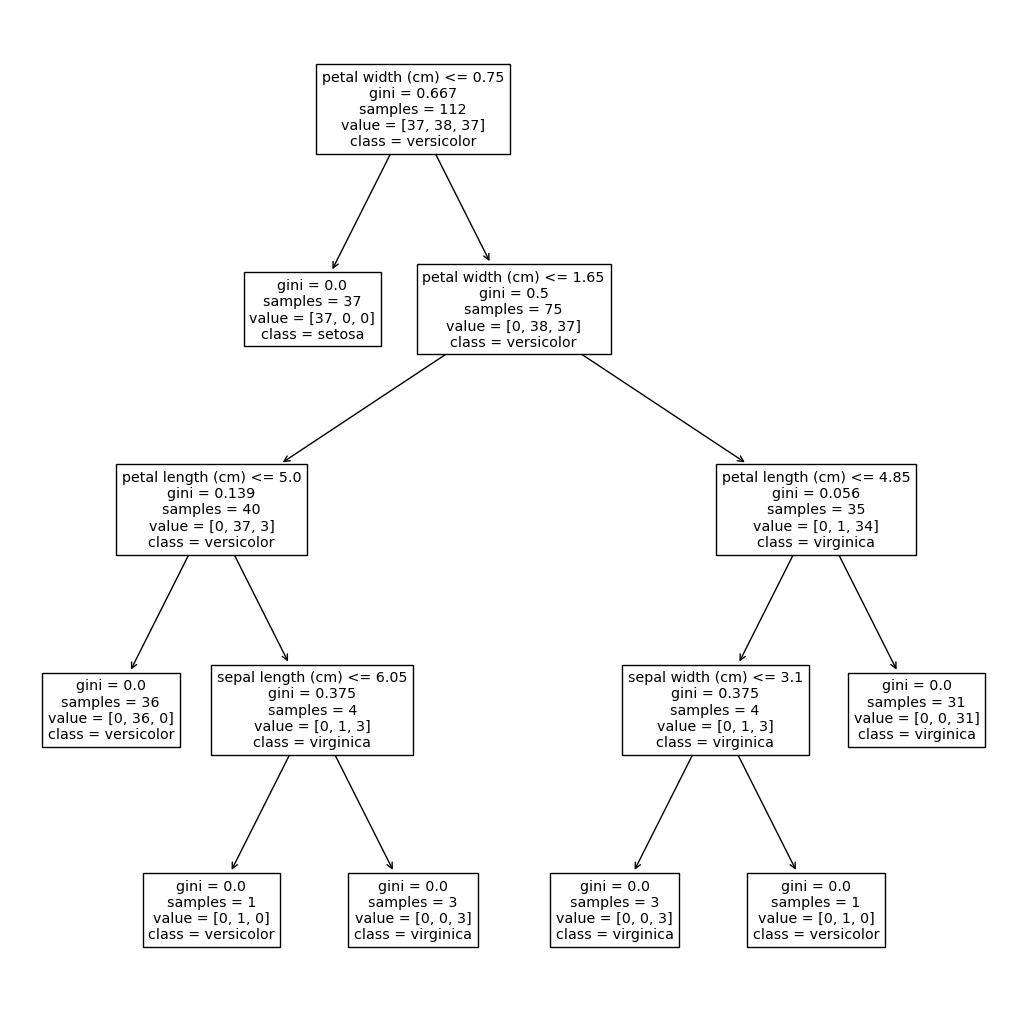

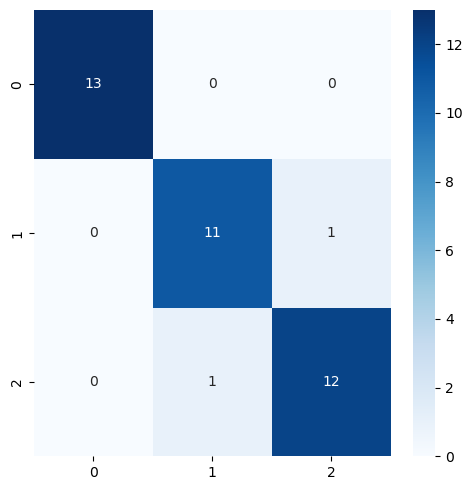

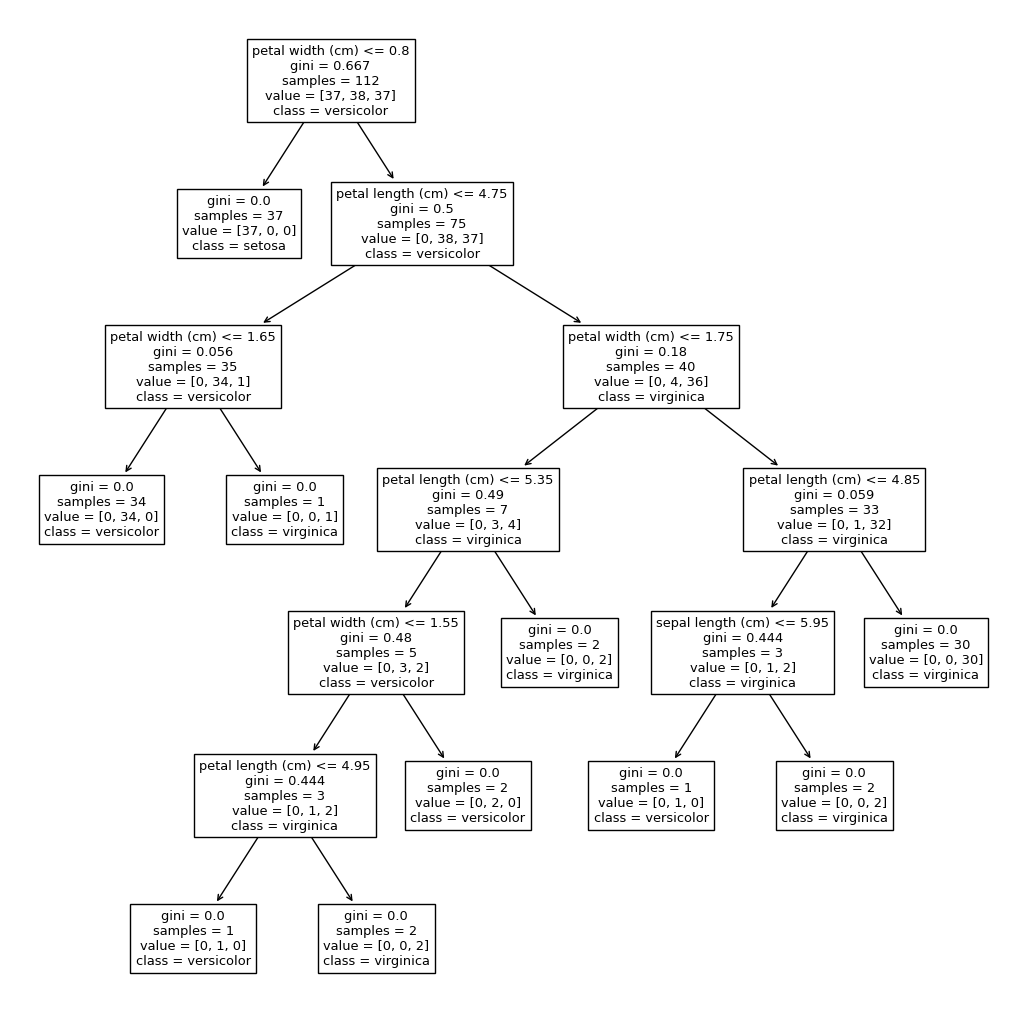

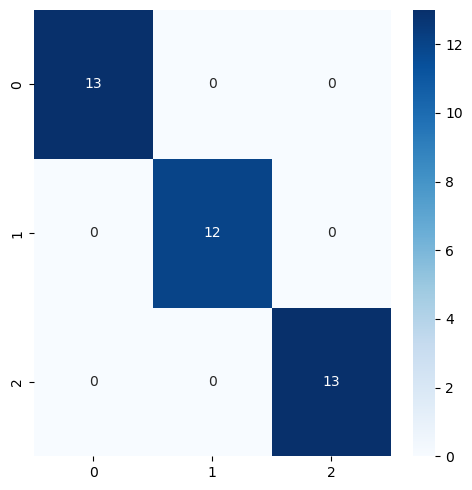

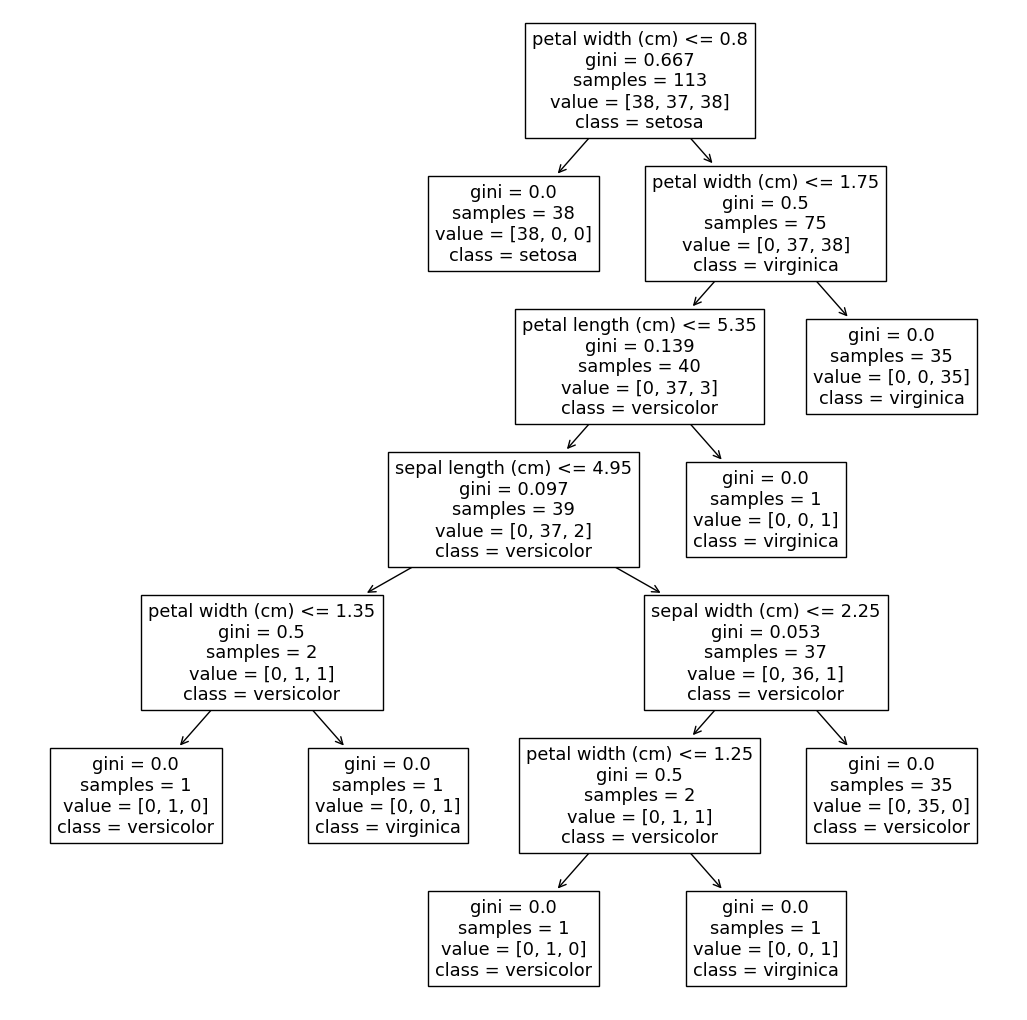

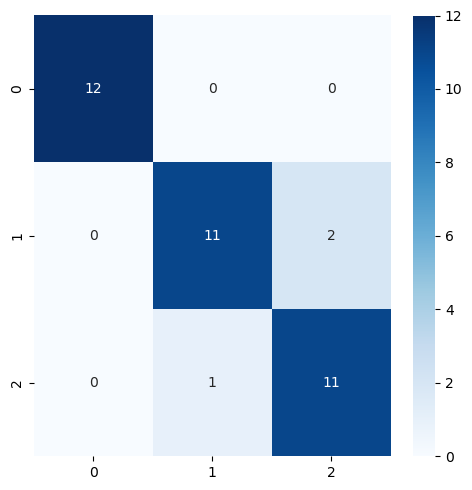

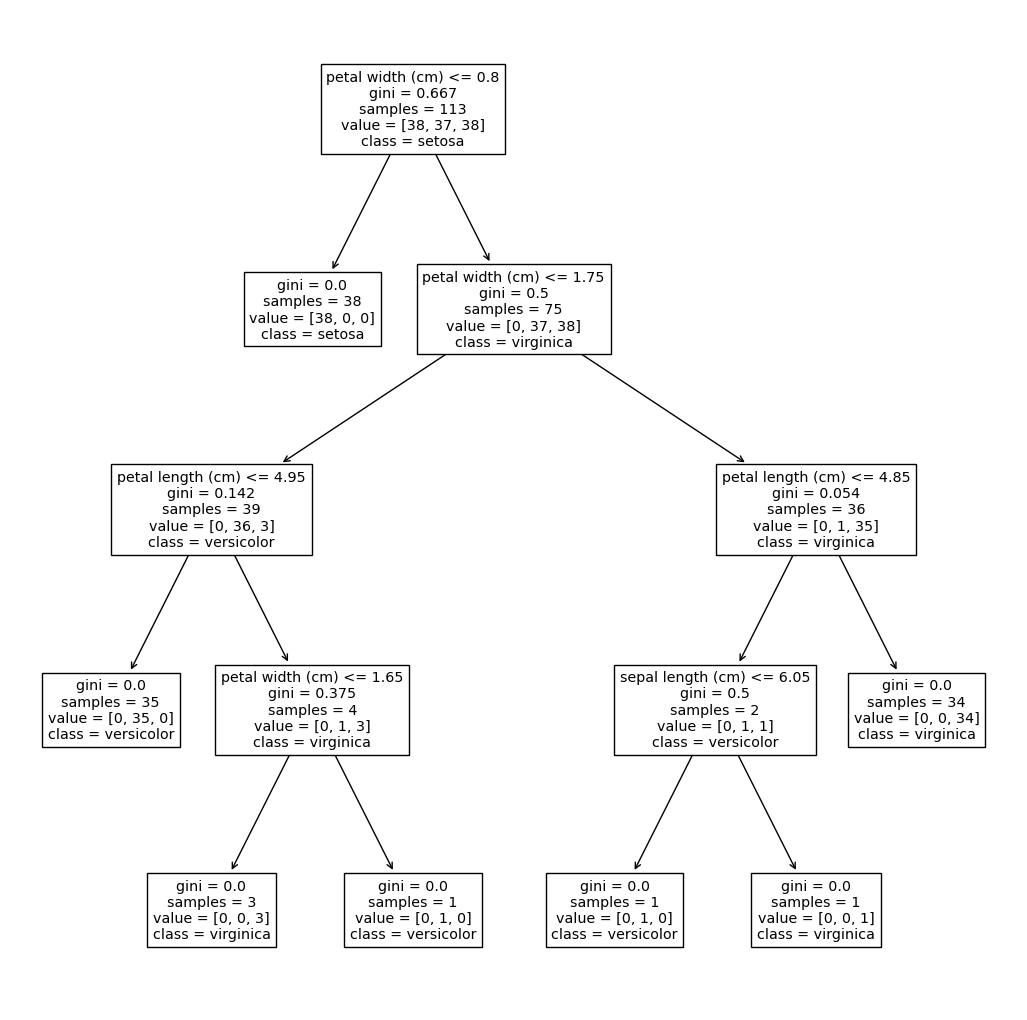

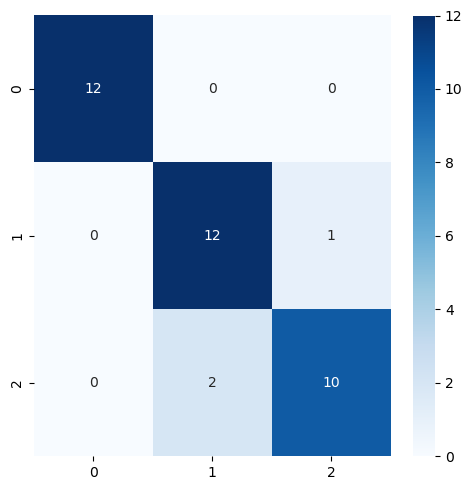

In [11]:
#4. Define decision model and split method

#define decision model
model_name = 'Decision Tree'
model2 = dt(random_state=0)

#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]

for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    
    #fit decision tree model and predict y_p
    model2.fit(X_tr, y_tr)
    y_p = model2.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
    # plot and save Decision tree 
    fig = plt.figure(figsize=(13, 13))
    # plot tree
    tree.plot_tree(model2, feature_names=iris.feature_names,  class_names=iris.target_names, filled=False)
    plt.savefig(savePath + '\\' + 'iris_' + str(len(accuracy_l)) + 'decision_tree.png')
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '\\' + 'iris_' + str(len(accuracy_l)) + 'confusion matrix.png')
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)
    result_matrix.to_csv(savePath + '\\' + 'cv_' + str(len(accuracy_l)) + '.csv', index = False)


### Explanation: Decision Tree Result

* The number of observations is 150, the number of observations in each class is ([50,50,50]),
* If we look at the root node, we can see the decision rule is : if petal widths are less than or equal to 0.8, then go to the left branch; if not, go to the right branch.
* We can also see that the Gini impurity index is (0.667).
* At that node the learner found that a single decision rule (petal width (cm) <= 0.8) was able to perfectly identify all the setosa class observations. 
* Furthermore, with one more decision rule with the same feature (petal width (cm) <= 1.75) the decision tree together with other features and classify other iris classess.

### Model Evaluation with Confusion Matrix

Most classification tasks seek the model that provide the highest accuracy when applied to the test set.

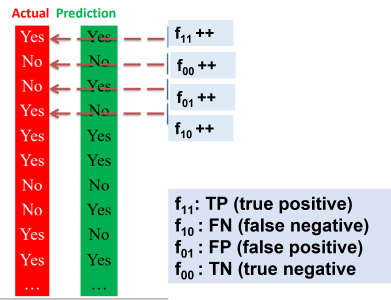

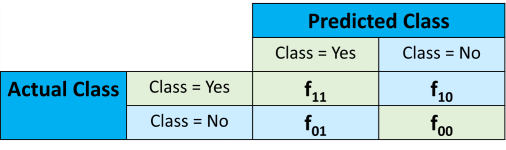

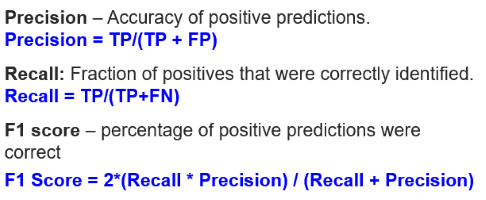

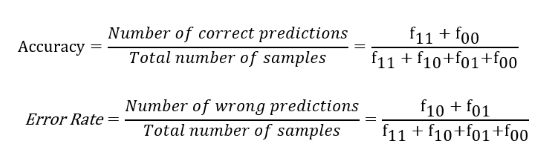

In [ ]:
##  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))

In [ ]:
##  Confusion matrix and classification report
a = confusion_matrix(y_v,y_p)
print("Decision tree Prediction confusion_matrix", "\n", a)
print("\n")

print("Decision tree Prediction classification report", "\n", classification_report(y_v,y_p))

sentosa_accuracy =  a[0,0] / (a[0,1]+a[0,2]+a[0,0])
print("sentosa_accuracy:", sentosa_accuracy.round(2))
                                        
verisicolour_accuracy = a[1,1] / (a[1,0] + a[1,1] + a[1,2])
print("verisicolour_accuracy:", verisicolour_accuracy.round(2))

virginicia_accuracy = a[2,2] / (a[2,0] + a[2,1] + a[2,2])
print("virginicia_accuracy:", virginicia_accuracy.round(2))

### Pre-pruning Controlling Tree Parameters

* Manually determine the structure and depth of a decision tree.
* max_depth - Maximum depth of the tree. If None, the tree is grown until all leaves are pure. If an integer, the tree is effectively “pruned” to that depth.
* min_samples_split - Minimum number of observations at a node before that node is split. If an integer is supplied , it determines the raw minimum, while if a float is supplied, it determines the minimums percent of total observations.
* min_samples_leaf - Minimum number of observations required to be at a leaf. Uses the same arguments as min_samples_split.
* max_leaf_nodes - Maximum number of leaves.
* min_impurity_split  - Minimum impurity decrease required before a split is performed

In [ ]:
#Create decision tree classifier object and Controlling Tree Parameters
# import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import tree
#Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create decision tree classifier object and Controlling Tree Parameters
decisiontree = DecisionTreeClassifier(random_state=0,                                      
                                        max_depth=3,                                      
                                        min_samples_split=2,                                      
                                        min_samples_leaf=1,                                                                         
                                        max_leaf_nodes=None,                                      
                                        min_impurity_decrease=0)
# Train model
model1 = decisiontree.fit(features, target)

#plot and save a decision tree
# define figure size
fig = plt.figure(figsize=(20, 15))
# plot tree
tree.plot_tree(model1, feature_names=iris.feature_names,  class_names=iris.target_names, filled=False)
#save tree
plt.savefig('mydecision_tree1.png')

## Tune Hyperparameters with Grid Search
Grid search is a widely used method for tuning model hyperparameters. The algorithm operates on a straightforward principle: it receives a set of hyperparameters along with the respective values to be tested, and proceeds to perform an exhaustive search over all possible value combinations, training a model for each combination. Following this, the algorithm evaluates the performance of each model and retains the one with the highest score. Often, grid search is employed in conjunction with cross-validation, involving multiple training iterations across different data folds for each hyperparameter combination, thereby yielding a more robust assessment of model performance on unseen data.

#### Step 1: Import Necessary Libraries, Load and Prepare the Data

In [1]:
from sklearn.model_selection import GridSearchCV
import os 
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs
from sklearn import tree
import time
# get iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target

#### Step 2: Set Up a Grid of Hyperparameter Values

#### Step 2.1: Choose Hyperparameters to Tune

Identify the hyperparameters that significantly affect the model's performance. Common examples for a decision tree include max_depth, min_samples_split, min_samples_leaf, and criterion.

**max_depth**: The max_depth parameter specifies the maximum depth of the tree, or the maximum length of the paths from the root node to the leaves.
* Overfitting vs. Underfitting: A deeper tree (higher max_depth) can model more complex patterns and capture more detailed information about the data. However, it can also lead to overfitting, where the model is too tailored to the training data and performs poorly on unseen data. Conversely, a shallow tree (lower max_depth) might underfit, failing to capture important patterns in the data.

**min_samples_split**: This parameter determines the minimum number of samples a node must have before it can be split.
* Control Overfitting: Higher values prevent the model from learning overly specific patterns, reducing overfitting.
* Tree Depth and Complexity: Increasing min_samples_split can lead to a less complex tree, as fewer splits mean fewer branches and shallower trees.

**min_samples_leaf**: This parameter sets the minimum number of samples that a leaf node must have.
* Smooth Model: By requiring a minimum number of samples in each leaf, the model is constrained to make more general predictions, which typically enhances the model’s ability to generalize.
* Avoids Overfitting: Like min_samples_split, a larger min_samples_leaf value can reduce the risk of fitting noise in the training data.

**criterion**: The criterion is the function used to measure the quality of a split. The two most common functions are gini for the Gini impurity and entropy for the information gain, both of which are measures of node purity.
* Model Accuracy and Speed: While both gini and entropy aim to maximize the homogeneity of target variables within the subsets created by the split, they do so in slightly different ways. Gini is usually faster to compute and is the default in scikit-learn, making it suitable for most cases. Entropy might be more thorough as it tries to maximize information gain, leading to slightly different tree structures.
* Splitting Behavior: The choice of criterion affects how trees prioritize splits. Entropy might lead to more balanced trees, while gini might be slightly biased towards larger partitions.

#### Step 2.2: Define Hyperparameter Ranges
For parameters where you want to sample from a discrete set of values (e.g., max_depth in a decision tree), you can simply provide a list or use range() if the parameter accepts integer values.

In [ ]:
#The hyperparameter values are organized into a dictionary format to facilitate their integration with GridSearchCV.
model_params  = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1, 20),
    "min_samples_split": range(2, 20),  # Starting from 2 as 1 would result in no splitting
    "min_samples_leaf": range(1, 20)
}

#### Step 3: Define and Train the Model with Grid Search
The most important arguments to pass to GridSearchCV are the model being trained, the dictionary of parameter values being tested, and the number of folds for cross-validation.

The grid search conducts an exhaustive search over all possible combinations of the hyperparameter values provided. The chosen number of cross-validation folds determines how many times each model is trained on a different subset of data to assess model quality.

The outcome of training the grid search is the identification of the best-performing model across all candidates.

In [ ]:
start_time = time.time()
# create Decision Tree classifier model
dt_model = dt()

# set up grid search
clf = GridSearchCV(dt_model, model_params, cv=5)

# train the grid search to find the best model
model = clf.fit(X, y)

# print winning set of hyperparameters
print(model.best_params_)
end_time = time.time()
total_time = end_time - start_time
print(f"The program took {round(total_time,0)} seconds to run.")

#### Step 4: Generate Predictions Using the Best Model
Now that the model is tuned, there's no additional work needed to generate predictions from the best model that grid search identified. Simply call .predict() on the meta-estimator to proceed.

In [ ]:
X = pd.DataFrame(X)
y= pd.DataFrame(y)
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]

for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
  
    y_p = model.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()

Grid search is also an expensive algorithm. It's important to choose parameter values carefully. For each additional value added to the grid search for one hyperparameter, the algorithm will train it against all other possible values of all other parameters being tuned. Paired with 5-fold cross-validation, this process will be repeated five times. This can quickly spiral out of control into a scenario where the model never finishes training.








## Tune Hyperparameters with Randomized Search
The randomized search is an algorithm that trains and evaluates a series of models by taking random draws from a predetermined set of hyperparameter distributions. The algorithm picks the most successful version of the model it has seen after training N different versions with various randomly selected hyperparameter combinations, leaving one with a model trained on a near-optimal set of hyperparameters.

This method has an advantage over grid search in that it searches over distributions of parameter values rather than predetermined lists of candidate values for each hyperparameter. Being able to search over hyperparameter distributions also allows more precise control over the expected values of hyperparameters; if there is a preference to draw values from distributions that are normally, Poisson, or uniformly distributed, this can be specified accordingly.

Random search is commonly used in tandem with cross-validation to achieve a more reliable estimate of each candidate model’s out-of-sample performance.

#### Step 1: Import Necessary Libraries, Load and Prepare the Data

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import os 
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs
from sklearn import tree
from scipy.stats import randint
import time
# get iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target

#### Step 2: Set Up Hyperparameter Distributions
#### Step 2.1: Choose Hyperparameters to Tune
Identify the hyperparameters that significantly affect the model's performance. Common examples for a decision tree include max_depth, min_samples_split, min_samples_leaf, and criterion.

#### Step 2.2: Define Distributions or Ranges
For each hyperparameter, decide whether to use a fixed list of values or a statistical distribution. This decision often depends on your understanding of the hyperparameter and the model's sensitivity to it.
* Fixed List: Use when you have specific values you want to test.
* Distributions: Use when you are unsure of the best range and want to sample across a continuous range. By using statistical distributions, RandomizedSearchCV can more efficiently explore a wide range of values for each parameter. It avoids the exhaustive nature of GridSearchCV while still providing a thorough sampling of the parameter space, which can lead to discovering better-performing hyperparameter settings that might be missed with a more rigid, grid-based approach.

In [ ]:
#The hyperparameter distributions are set up as a dictionary so they can be passed to RandomizedSearchCV.
model_params = {
    'criterion': ['gini', 'entropy'],  # Categorical, hence list
    'max_depth': randint(1, 20),  # Uniform distribution over [1, 20) for max_depth
    'min_samples_split': randint(2, 20),  # Uniform distribution over [2, 20) for min_samples_split
    'min_samples_leaf': randint(1, 20)  # Uniform distribution over [1, 20) for min_samples_leaf
}
#Uniform Sampling: randint samples from a uniform distribution over the given range, meaning every integer within the range is equally likely to be chosen. 
#This uniformity ensures that no particular segment of a range is favored over another, providing a fair sampling of all possible integer values.
#By sampling uniformly, randint helps in thoroughly exploring the hyperparameter space. This can be particularly 
#advantageous when the relationship between the hyperparameter and the model's performance is not linear or well-understood.

#### Define and Train the Model with Random Search

The most important arguments to pass to RandomizedSearchCV are the model being trained, the dictionary of parameter distributions, the number of iterations for random search to perform, and the number of folds for cross-validation.

Each iteration represents a new model trained on a new draw from the dictionary of hyperparameter distributions. The number of cross-validation folds chosen determines how many times each model will be trained on a different subset of data to assess model quality. The total number of models that random search trains is equal to the product of the number of iterations and the number of cross-validation folds.

The outcome of training the randomized search meta-estimator will be the best model that was identified from all the candidate models across the iterations.

In [ ]:
start_time = time.time()
# create Decision Tree classifier model
dt_model = dt()

# set up random search meta-estimator
# The number of iterations (n_iter) controls how many different combinations are tried.
clf = RandomizedSearchCV(dt_model, model_params, n_iter=100, cv=5, random_state=1)

# train the random search to find the best model out of 100 candidates
model = clf.fit(X, y)

# print winning set of hyperparameters
print(model.best_params_)
end_time = time.time()
total_time = end_time - start_time
print(f"The program took {round(total_time,0)} seconds to run.")

In [ ]:
X = pd.DataFrame(X)
y= pd.DataFrame(y)
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]

for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
  
    y_p = model.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()

GridSearchCV, by trying all combinations, might overfit to the training or validation set, especially if the dataset is not large enough or the parameter grid is too detailed. RandomizedSearchCV, sampling randomly, often ends up with a model that generalizes better to unseen data.